# DATASCI 420 CB
## Milestone 3- Reem Coomes
#### Secom dataset

In [119]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


##  Section one include the following steps:  
- Read both datasets Secom and Secom labels from UNI the machine learning repository 
- Concatenate both dataset into one dataframe df  
- Change columns headers to strings 
- Examine df (head, shape, info, stats, and types) 
- Drop constant columns and the one that have missing data more than 50% 
- Fill na places with the median 
- check out the distribution of the target variable- histogram. 
- Get dummies for the target variable to transfer to 1 and 0    
- Normalize the dataset 
- Set the date column as an index

In [120]:
# Datasets upload
url1 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
url2='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'

# Read csv
df1 = pd.read_csv(url1,sep='\s+',header=None)
df2 = pd.read_csv(url2,sep='\s+',header=None)

# Merge datasets
df= pd.concat([df1, df2], axis=1, ignore_index=True)

# Columns header as a string 
df.columns = df.columns.astype(str)

In [121]:
# Head
print('\033[1m','dataset:','\033[0m','\n',df.head(10))
print('-------------------------------------------------------------------------------')

# Shape
print('\033[1m','dataset shape: ','\033[0m',df.shape)
print('-------------------------------------------------------------------------------')

# Info
print('\033[1m','dataset info: ' ,'\033[0m','\n',df.info())
print('-------------------------------------------------------------------------------')

# Stats
print('\033[1m','dataset stats: ' ,'\033[0m','\n',df.describe())
print('-------------------------------------------------------------------------------')

# Types
print('\033[1m','dataset types: ' ,'\033[0m','\n',df.dtypes)
print('-------------------------------------------------------------------------------')

 dataset:  
          0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
7  3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
8  2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
9  3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   

        8       9  ...     582     583     584      585     586     587  \
0  1.5005  0.0162  ...  0.5005  0.0118  0.0035   2.36

In [122]:
# percentage missing in a dataframe
percentage_missing= df.isna().mean().round(4)*100

# Let's create a dataframe that hold the percentages
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percentage_missing})

# Drop columns with more than 50% missing data
above50=missing_value_df.loc[:,'percent_missing']>50
x=missing_value_df.loc[above50,:]
df.drop(x['column_name'],axis=1,inplace=True)
print(df.shape)

# Fill na values with the median
df.fillna(df.median(), inplace=True)

(1567, 564)


In [123]:
# Drop constant columns 
secom_df=df.copy()
secom_describe=secom_df.describe()
x=secom_describe.loc[:,secom_describe.loc['std',:]<=0.1]
x.columns
secom_df.drop(x.columns,axis=1,inplace=True)
secom_df.shape

(1567, 299)

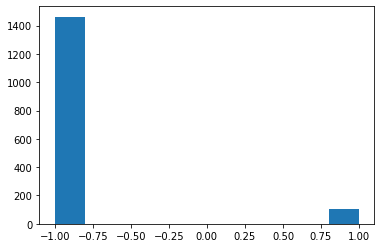

In [124]:
# Histogram for the target variable
plt.hist(secom_df['590'])
plt.show()

In [125]:
# -1 becomes 1 (good) - 1 becomes 0 (bad)
secom_df=pd.get_dummies(secom_df,columns=['590'],drop_first=True)
secom_df.head()

,0,1,2,3,4,6,12,14,15,16,...,571,572,573,574,576,577,585,589,591,590_1
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,2.1113,8.95,0.3157,3.0624,1.6765,14.9509,2.3630,71.9005,19/07/2008 11:55:00,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,2.4335,5.92,0.2653,2.0111,1.1065,10.9003,4.4447,208.2045,19/07/2008 12:32:00,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,2.0293,11.21,0.1882,4.0923,2.0952,9.2721,3.1745,82.8602,19/07/2008 13:17:00,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,2.0253,9.33,0.1738,2.8971,1.7585,8.5831,2.0544,73.8432,19/07/2008 14:43:00,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,2.0275,8.83,0.2224,3.1776,1.6597,10.9698,99.3032,73.8432,19/07/2008 15:22:00,0


In [126]:
# Scale dataset 
secom_inputs=secom_df.loc[:,'0':'589']
target=secom_df.loc[:,'590_1']
Date=secom_df.loc[:,'591']
inputs_scaled=pd.DataFrame(preprocessing.scale(secom_inputs),columns=secom_inputs.columns)
secom_scaled=inputs_scaled
secom_scaled.loc[:,'590_1']=target
secom_scaled.loc[:,'Date']=Date
secom=secom_scaled.copy()
print(secom.shape)
print(secom.head())

(1567, 299)
          0         1         2         3         4         6        12  \
0  0.224463  0.849523 -0.436430  0.035804 -0.050121 -0.564354  0.763117   
1  1.107287 -0.383106  1.016977  0.155282 -0.059585  0.197639  0.181528   
2 -1.114000  0.798901 -0.481447  0.688278 -0.047447 -0.906768  0.633530   
3 -0.350156 -0.199072 -0.051705 -1.104376 -0.050831  0.502662  0.581382   
4  0.242296  0.087328  1.117227 -0.156616 -0.047033 -0.115954  0.610329   

         14        15        16  ...       571       572       573       574  \
0 -0.375756  0.103879  0.056566  ...  0.034410 -0.226018 -0.120518 -0.226665   
1  0.411562  0.095954 -0.269742  ...  1.205944 -0.261137 -0.323417 -0.265730   
2  0.182742  0.210657 -0.247041  ... -0.263745 -0.199823 -0.633805 -0.188395   
3  0.214786  0.535203 -0.089594  ... -0.278290 -0.221613 -0.691776 -0.232808   
4  0.558822  0.436541  0.179609  ... -0.270290 -0.227409 -0.496123 -0.222385   

        576       577        585       589  590_1       

In [127]:
# Set the date column as an index 
secom.index = pd.to_datetime(secom['Date'], format='%d/%m/%Y %H:%M:%S')
secom.drop(['Date'],axis=1,inplace=True)
secom.head()

,0,1,2,3,4,6,12,14,15,16,...,570,571,572,573,574,576,577,585,589,590_1
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,0.224463,0.849523,-0.436430,0.035804,-0.050121,-0.564354,0.763117,-0.375756,0.103879,0.056566,...,0.190142,0.034410,-0.226018,-0.120518,-0.226665,-0.229797,-0.135520,-0.197057,-0.295753,0
2008-07-19 12:32:00,1.107287,-0.383106,1.016977,0.155282,-0.059585,0.197639,0.181528,0.411562,0.095954,-0.269742,...,0.256816,1.205944,-0.261137,-0.323417,-0.265730,-0.263493,-0.460054,0.385113,1.156846,0
2008-07-19 13:17:00,-1.114000,0.798901,-0.481447,0.688278,-0.047447,-0.906768,0.633530,0.182742,0.210657,-0.247041,...,0.257279,-0.263745,-0.199823,-0.633805,-0.188395,-0.205046,-0.590505,0.029888,-0.178955,1
2008-07-19 14:43:00,-0.350156,-0.199072,-0.051705,-1.104376,-0.050831,0.502662,0.581382,0.214786,0.535203,-0.089594,...,0.002548,-0.278290,-0.221613,-0.691776,-0.232808,-0.224950,-0.645708,-0.283360,-0.275049,0
2008-07-19 15:22:00,0.242296,0.087328,1.117227,-0.156616,-0.047033,-0.115954,0.610329,0.558822,0.436541,0.179609,...,0.085279,-0.270290,-0.227409,-0.496123,-0.222385,-0.230791,-0.454486,26.913337,-0.275049,0


##  Section two include the following steps:  
- Use the features that were already selected in milestone 1  
- Create SMOT object to take care of the imbalanced data
- Split the dataset into train-test sets

In [128]:
# Features selected from milestone 1
inputs= secom[['21','28','32','33','59','64','122','123','124','125','127','129','195','197','198','430','431','467','510','519']]
target= secom[['590_1']]

In [129]:
# create a SMOTE object
sm = SMOTE(random_state=42)

# use SMOTE to fit the data in X and y
X_SMOT, Y_SMOT = sm.fit_sample(inputs, target.values.ravel())
print(np.unique(target, return_counts=True))
print(np.unique(Y_SMOT, return_counts=True))
print ('X_SMOT shape',X_SMOT.shape)
print ('Y_SMOT shape',Y_SMOT.shape)

(array([0, 1], dtype=uint8), array([1463,  104], dtype=int64))
(array([0, 1], dtype=uint8), array([1463, 1463], dtype=int64))
X_SMOT shape (2926, 20)
Y_SMOT shape (2926,)


In [130]:
#Split data after SMOT into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_SMOT, Y_SMOT, test_size=0.30, random_state=0)
X_train.shape
X_test.shape

(878, 20)

## Section three include the following:  
### 1 - Build a simple neural network model   
### 2- Build a DNN model  
### 3- Build a RNN model  

#### 1 - Build a simple neural network model  
- The first layer is the input layer  
- The next layer is  with 100 units and sofmax activation function 
- The output layer must create 1 output value 
- Activation function is relu.

In [131]:
# Build a simple neural network model
tf.compat.v1.random.set_random_seed(7299)

tfclf = keras.Sequential()
tfclf.add(layers.Flatten())
# Let's add ONE hidden layers of 100 units each

tfclf.add(layers.Dense(100,activation='softmax',input_dim=20))


# also have to add the output layer
tfclf.add(layers.Dense(1,activation='relu'))

# pick an optimizer
# for the complete list of optimizers see https://keras.io/optimizers/
optimizer = keras.optimizers.Adam(learning_rate = 0.05)

# compile the model
# the metrics parameter is just for reporting
tfclf.compile(optimizer = optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit and predict
tfclf.fit(X_train, Y_train, epochs=20, batch_size=10, verbose=1)

# Results
result = tfclf.evaluate(X_test, Y_test, verbose=0)
print('\n\nTest loss, accuracy:', result)

Train on 2048 samples
Epoch 1/20
2048/2048 [==============================] - 0s 170us/sample - loss: 0.6222 - accuracy: 0.7026
Epoch 2/20
2048/2048 [==============================] - 0s 92us/sample - loss: 0.6881 - accuracy: 0.7788
Epoch 3/20
2048/2048 [==============================] - 0s 91us/sample - loss: 0.8793 - accuracy: 0.7192
Epoch 4/20
2048/2048 [==============================] - 0s 91us/sample - loss: 2.4250 - accuracy: 0.7334
Epoch 5/20
2048/2048 [==============================] - 0s 91us/sample - loss: 3.0464 - accuracy: 0.6729
Epoch 6/20
2048/2048 [==============================] - 0s 98us/sample - loss: 2.7170 - accuracy: 0.6953
Epoch 7/20
2048/2048 [==============================] - 0s 96us/sample - loss: 2.4961 - accuracy: 0.6895
Epoch 8/20
2048/2048 [==============================] - 0s 100us/sample - loss: 1.9384 - accuracy: 0.6807
Epoch 9/20
2048/2048 [==============================] - 0s 113us/sample - loss: 1.7630 - accuracy: 0.7026
Epoch 10/20
2048/2048 [=======

In [156]:
# ANN classification report
pred_Y = tfclf.predict_classes(X_test, batch_size=1)
print(classification_report(Y_test, pred_Y))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70       458
           1       0.67      0.90      0.77       420

    accuracy                           0.74       878
   macro avg       0.77      0.74      0.73       878
weighted avg       0.77      0.74      0.73       878



#### 2- Build a DNN model

In [133]:

tfclf2 =  tf.keras.Sequential()

# The first layer flattens the input
tfclf2.add(layers.Flatten())
tfclf2.add(layers.Dense(25,activation='sigmoid',input_shape=(20,)))
tfclf2.add(layers.Dropout(0.2))
tfclf2.add(layers.Dense(25, activation='sigmoid'))
tfclf2.add(layers.Dropout(0.3))



# There are 1 output categories, so we need ten 
tfclf2.add(layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate = 0.05)

# compile the model

tfclf2.compile(optimizer = optimizer,
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Fit and predict
history = tfclf2.fit(X_train, Y_train,epochs=20, batch_size=10, verbose=1)
Yptest = tfclf2.evaluate(X_test, Y_test, verbose=0)
print('\n\nTest loss, accuracy:', Yptest)

Train on 2048 samples
Epoch 1/20
2048/2048 [==============================] - 0s 226us/sample - loss: 0.5797 - accuracy: 0.7075
Epoch 2/20
2048/2048 [==============================] - 0s 102us/sample - loss: 0.5130 - accuracy: 0.7568
Epoch 3/20
2048/2048 [==============================] - 0s 100us/sample - loss: 0.4792 - accuracy: 0.7725
Epoch 4/20
2048/2048 [==============================] - 0s 99us/sample - loss: 0.4409 - accuracy: 0.7930
Epoch 5/20
2048/2048 [==============================] - 0s 100us/sample - loss: 0.4278 - accuracy: 0.8066
Epoch 6/20
2048/2048 [==============================] - 0s 130us/sample - loss: 0.4254 - accuracy: 0.8086
Epoch 7/20
2048/2048 [==============================] - 0s 135us/sample - loss: 0.3957 - accuracy: 0.8257
Epoch 8/20
2048/2048 [==============================] - 0s 113us/sample - loss: 0.4092 - accuracy: 0.8193
Epoch 9/20
2048/2048 [==============================] - 0s 100us/sample - loss: 0.3883 - accuracy: 0.8330
Epoch 10/20
2048/2048 [==

In [134]:
# DNN classification report
pred_y = tfclf2.predict_classes(X_test, batch_size=1)
print(classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       458
           1       0.82      0.98      0.89       420

    accuracy                           0.89       878
   macro avg       0.90      0.89      0.89       878
weighted avg       0.90      0.89      0.89       878



####  3-Build a RNN model

In [135]:
# reshape the data so that each time point becomes a "batch"
XX_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
XX_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [166]:
# create an RNN network
rnn = keras.Sequential()

# add  RNN layers
rnn.add(layers.SimpleRNN(10, input_shape=(1, 20), stateful=True, batch_size=1,return_sequences=True))
rnn.add(layers.SimpleRNN(10,  stateful=True, batch_size=1,return_sequences=True))
rnn.add(layers.SimpleRNN(10,  stateful=True, batch_size=1,return_sequences=True))
rnn.add(layers.SimpleRNN(10,  stateful=True, batch_size=1))
# The output layer is an ordinary Dense layer with one (sigmoid) output
rnn.add(layers.Dense(1, activation='sigmoid'))  

# compile the model as usual
# We'll use MSE as the loss function 
# (binary cross entropy does not work so well here)
rnn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [167]:
# we can print out a summary of our model
rnn.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_19 (SimpleRNN)    (1, 1, 10)                310       
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (1, 1, 10)                210       
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (1, 1, 10)                210       
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (1, 10)                   210       
_________________________________________________________________
dense_182 (Dense)            (1, 1)                    11        
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


In [168]:
rnn.fit(XX_train, Y_train, epochs=20, batch_size=1, verbose=1, shuffle=False)# no shuffle casue it is a timeseries
Yptest3 = rnn.evaluate(XX_test, Y_test, verbose=0)
print('\n\nTest loss, accuracy:', Yptest3)

Train on 2048 samples
Epoch 1/20
2048/2048 [==============================] - 11s 6ms/sample - loss: 0.2146 - accuracy: 0.6631
Epoch 2/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1833 - accuracy: 0.7334
Epoch 3/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1761 - accuracy: 0.7451
Epoch 4/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1707 - accuracy: 0.7568
Epoch 5/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1654 - accuracy: 0.7729
Epoch 6/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1606 - accuracy: 0.7783
Epoch 7/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1559 - accuracy: 0.7886
Epoch 8/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1513 - accuracy: 0.7969
Epoch 9/20
2048/2048 [==============================] - 11s 5ms/sample - loss: 0.1463 - accuracy: 0.8042
Epoch 10/20
2048/2048 [==========

In [169]:
# RNN classification report
XX_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
pred_y3= rnn.predict_classes(XX_test, batch_size=1)
print(classification_report(Y_test, pred_y3))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       458
           1       0.73      0.90      0.81       420

    accuracy                           0.80       878
   macro avg       0.81      0.80      0.80       878
weighted avg       0.81      0.80      0.79       878



# Summary:
To prepare our dataset for analysis I have applied several data cleaning techniques and reduced the feature count from 590 to 299. I also applied SMOT to balance the target variable. I included only 20 features in the various neural network models. 

The simple neural network achieves accuracy of ~74% with recall for class 0 (faulty) is 0.59.  
The deep neural network achieves accuracy ~87% with an imrovement of recall to 0.81.   
The recurrent neural network achieves accuracy ~0.80 and recall 0.73.  

Looking at the past milestones, the accuracy was around ~77% for the decision tree model, ~83% for the ensemble model and ~89% for SVM model.  

It is well known that RNN are for sequences. If data is sequential in nature (time series) than it is preferable to use RNN over DNN and other "static" models.  

We can observe from my notebook that DNN performed the best, however such sequential datasets are much better addressed by RNN than non-recurrent models. For that, my recommendation for the Secom analysis is to use LSTM-based models and look out for the vanishing gradient problem. 